In [2]:
import os
import numpy as np
from IPython.display import HTML
import matplotlib.pyplot as plt

from HMM import unsupervised_HMM
from HMM_helper import (
    
    text_to_wordcloud,
    states_to_wordclouds,
    parse_observations,
    sample_sentence,
    sample_sentence2,
    visualize_sparsities,
    animate_emission
)

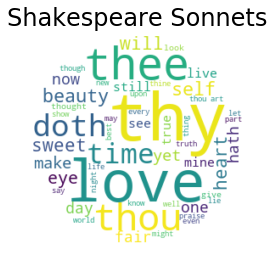

In [3]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()
wordcloud = text_to_wordcloud(text, title='Shakespeare Sonnets')

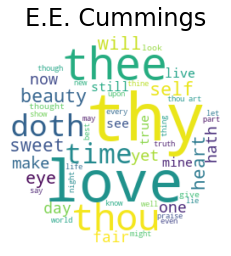

In [4]:
text1 = open(os.path.join(os.getcwd(), 'data/eecummings.txt')).read()
wordcloud = text_to_wordcloud(text, title='E.E. Cummings')

In [5]:
from __future__ import print_function

from tensorflow.keras.callbacks import LambdaCallback
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import RMSprop
import sys
import random

In [6]:
text = open(os.path.join(os.getcwd(), 'data/shakespeare.txt')).read()

chars = sorted(list(set(text)))
char_indices = dict()
for i in range(len(chars)):
    char_indices[chars[i]] = i
    
indices_char = dict()
for i in range(len(chars)):
    char_indices[i] = chars[i]

sequence_length = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - sequence_length, step): 
    sentences.append(text[i: i + sequence_length])
    next_chars.append(text[i + sequence_length])
    
x = np.zeros((len(sentences), sequence_length, len(chars)))
y = np.zeros((len(sentences), len(chars)))

for i in range(len(sentences)):
    sentence = sentences[i]
    for j in range(len(sentence)):
        char = sentence[j]
        x[i, j, char_indices[char]] = 1

for i in range(len(sentences)):
    y[i, char_indices[next_chars[i]]] = 1

In [7]:
def sample(preds, temperature=1.0):
    # helper function to sample an index from a probability array
    preds = np.asarray(preds).astype('float64')
    preds = np.log(preds) / temperature
    exp_preds = np.exp(preds)
    preds = exp_preds / np.sum(exp_preds)
    probas = np.random.multinomial(1, preds, 1)
    return np.argmax(probas)


def generate_text(model, temp_list, Nchars, seed='random'):
    start_index = random.randint(0, len(text) - sequence_length - 1)

    for temp in temp_list:
        print('----- temperature:', temp)
        if seed == 'random':
            sentence = text[start_index: start_index + sequence_length]
            print('----- Generating with seed: "' + sentence + '"')

        else:
            sentence = seed
            print('----- Generating with seed: "' + sentence + '"')
        
        print('\n')
        sys.stdout.write(sentence)
            
        for i in range(Nchars):
            x_pred = np.zeros((1, len(sentence), len(chars)))
            for t, char in enumerate(sentence):
                x_pred[0, t, char_indices[char]] = 1.

            preds = model.predict(x_pred, verbose=0)[0]
            next_index = sample(preds, temp)
            next_char = indices_char[next_index]

            sentence = sentence[1:] + next_char

            sys.stdout.write(next_char)
            sys.stdout.flush()
        print('\n')
        print()

In [8]:
print('Building model...')

model = Sequential()

model.add(LSTM(128, input_shape=(sequence_length, len(chars))))

model.add(Dense(len(chars), activation='softmax'))

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

print('Fitting model...')
History = model.fit(x, y,
          batch_size=128,
          epochs=100)

Building model...
Fitting model...
Train on 32663 samples
Epoch 1/100
32663/32663 [==============================] - 36s 1ms/sample - loss: 2.4237
Epoch 2/100
32663/32663 [==============================] - 33s 1ms/sample - loss: 1.9100
Epoch 3/100
32663/32663 [==============================] - 33s 1ms/sample - loss: 1.7343
Epoch 4/100
32663/32663 [==============================] - 33s 1ms/sample - loss: 1.6219
Epoch 5/100
32663/32663 [==============================] - 33s 1000us/sample - loss: 1.5269
Epoch 6/100
32663/32663 [==============================] - 33s 1ms/sample - loss: 1.4417
Epoch 7/100
32663/32663 [==============================] - 32s 995us/sample - loss: 1.3645
Epoch 8/100
32663/32663 [==============================] - 33s 1ms/sample - loss: 1.2946
Epoch 9/100
32663/32663 [==============================] - 33s 1000us/sample - loss: 1.2336
Epoch 10/100
32663/32663 [==============================] - 33s 1ms/sample - loss: 1.1837
Epoch 11/100
32663/32663 [=================

32663/32663 [==============================] - 34s 1ms/sample - loss: 0.4662
Epoch 92/100
32663/32663 [==============================] - 34s 1ms/sample - loss: 0.4611
Epoch 93/100
32663/32663 [==============================] - 34s 1ms/sample - loss: 0.4648
Epoch 94/100
32663/32663 [==============================] - 34s 1ms/sample - loss: 0.4579
Epoch 95/100
32663/32663 [==============================] - 57s 2ms/sample - loss: 0.4540
Epoch 96/100
32663/32663 [==============================] - 69s 2ms/sample - loss: 0.4510
Epoch 97/100
32663/32663 [==============================] - 59s 2ms/sample - loss: 0.4472
Epoch 98/100
32663/32663 [==============================] - 43s 1ms/sample - loss: 0.4422
Epoch 99/100
32663/32663 [==============================] - 41s 1ms/sample - loss: 0.4410
Epoch 100/100
32663/32663 [==============================] - 42s 1ms/sample - loss: 0.4486


In [13]:
generate_text(model, [0.25, 0.75, 1.5], 400, 'shall i compare thee to a summers day? \n')

----- temperature: 0.25
----- Generating with seed: "shall i compare thee to a summers day? 
"


shall i compare thee to a summers day? 
Wher

C:\Users\siqia\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in log
  after removing the cwd from sys.path.


ein greasing of words of me,
  If my self me thy sweet's receed charsess of mis,
  To blatcer come their sweet lime's be still:
  If makinot thy painting budd delight,
When I be thee sh my be mindrown,
  To coull acking strainst thine old wity,
And there revenure of seding mistrown
Which hart that which the linds of savelend:
But though the swire moused shorth more sweetn,
My too place what of


----- temperature: 0.75
----- Generating with seed: "shall i compare thee to a summers day? 
"


shall i compare thee to a summers day? 
Wherein the prests and a sweetled lifts'
By though in o'er well base will do your stare.
Which by tho bedger I not deconsuine,
Agathous his sight of war your self areming,
I lepon but ablate thee shoulds bends belie,
Which drewilNe and doth his ageh,
Where thou glash and bartered doth dieddme?
Who advil conscript complate in ments short.


                  1ovore,
Thy braint thy power, being me,



----- temperature: 1.5
----- Generating with seed: "shall i c

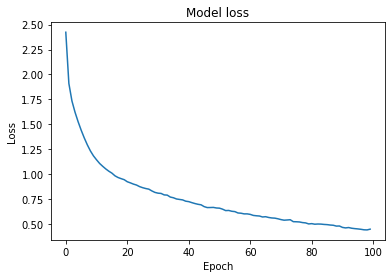

In [20]:
# Plot training & validation loss values
plt.plot(History.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [24]:
text = open(os.path.join(os.getcwd(), 'data/eecummings.txt')).read()

chars = sorted(list(set(text)))
char_indices = dict((c, i) for i, c in enumerate(chars))
indices_char = dict((i, c) for i, c in enumerate(chars))

sequence_length = 40
step = 3
sentences = []
next_chars = []
for i in range(0, len(text) - sequence_length, step): 
    sentences.append(text[i: i + sequence_length])
    next_chars.append(text[i + sequence_length])
    
x = np.zeros((len(sentences), sequence_length, len(chars)))
y = np.zeros((len(sentences), len(chars)))

for i in range(len(sentences)):
    sentence = sentences[i]
    for j in range(len(sentence)):
        char = sentence[j]
        x[i, j, char_indices[char]] = 1
    y[i, char_indices[next_chars[i]]] = 1
    
    
print('Building model...')

model = Sequential()

model.add(LSTM(128, input_shape=(sequence_length, len(chars))))

model.add(Dense(len(chars), activation='softmax'))

optimizer = RMSprop(learning_rate=0.01)
model.compile(loss='categorical_crossentropy', optimizer=optimizer)

print('Fitting model...')
model.fit(x, y,
          batch_size=128,
          epochs=100)

Building model...
Fitting model...
Train on 22892 samples
Epoch 1/100
22892/22892 [==============================] - 37s 2ms/sample - loss: 2.6492
Epoch 2/100
22892/22892 [==============================] - 28s 1ms/sample - loss: 2.2083
Epoch 3/100
22892/22892 [==============================] - 26s 1ms/sample - loss: 2.0377
Epoch 4/100
22892/22892 [==============================] - 24s 1ms/sample - loss: 1.9038
Epoch 5/100
22892/22892 [==============================] - 27s 1ms/sample - loss: 1.7867
Epoch 6/100
22892/22892 [==============================] - 29s 1ms/sample - loss: 1.6677
Epoch 7/100
22892/22892 [==============================] - 29s 1ms/sample - loss: 1.5566
Epoch 8/100
22892/22892 [==============================] - 26s 1ms/sample - loss: 1.4520
Epoch 9/100
22892/22892 [==============================] - 29s 1ms/sample - loss: 1.3572
Epoch 10/100
22892/22892 [==============================] - 24s 1ms/sample - loss: 1.2822
Epoch 11/100
22892/22892 [=========================

22892/22892 [==============================] - 41s 2ms/sample - loss: 0.3332
Epoch 92/100
22892/22892 [==============================] - 55s 2ms/sample - loss: 0.3329
Epoch 93/100
22892/22892 [==============================] - 40s 2ms/sample - loss: 0.3256
Epoch 94/100
22892/22892 [==============================] - 39s 2ms/sample - loss: 0.3195
Epoch 95/100
22892/22892 [==============================] - 26s 1ms/sample - loss: 0.3188
Epoch 96/100
22892/22892 [==============================] - 31s 1ms/sample - loss: 0.3135
Epoch 97/100
22892/22892 [==============================] - 40s 2ms/sample - loss: 0.3141
Epoch 98/100
22892/22892 [==============================] - 49s 2ms/sample - loss: 0.3145
Epoch 99/100
22892/22892 [==============================] - 35s 2ms/sample - loss: 0.3124
Epoch 100/100
22892/22892 [==============================] - 43s 2ms/sample - loss: 0.3063


In [13]:
string1 = 'Humanity i love you \nbecause you would rather'

generate_text(model, [0.25, 0.75, 1.5], 400, string1[:40])

----- temperature: 0.25
----- Generating with seed: "Humanity i love you 
because you would r"


Humanity i love you 
because you would reams 

who (oves than breathing peen am if the sear 

greads whom one string 
lover plet they string peath eom have i 
andely we'll shat of the seid 

comes hon't be and neling 
dare with lost shatt so strike 
and what my weards 

time is a seeken a reapped 

and souldowe: 

the han blow the secreating in small be sunding excopp, 



18 



sin the in must no excell 

soy handsterts are not yes th


----- temperature: 0.75
----- Generating with seed: "Humanity i love you 
because you would r"


Humanity i love you 
because you would reamsness 

forever over a was be mut stand 

lear by a little wromdive- 

to shoped than courd 

when the ward is a love 

the was ap guamsing for thinks a for for happing insmanumers 

may than the such the rain to sleek 
ruchouse are in this were same a a fear 
could frim the moom 

(with someonly because 

lasousus to 

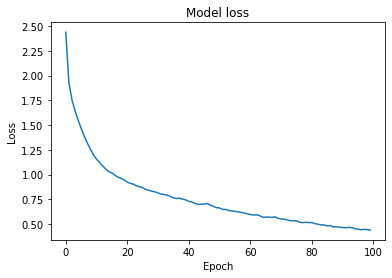

In [14]:
# Plot training & validation loss values
plt.plot(History.history['loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.show()

In [19]:
obs, obs_map = parse_observations(text)
hmm8 = unsupervised_HMM(obs, 10, 100)

Iteration: 0/100
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Iteration: 10/100
Seque

Sequence: 2000/2309
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Iteration: 90/100
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Sequence: 0/2309
Sequence: 500/2309
Sequence: 1000/2309
Sequence: 1500/2309
Sequence: 2000/2309
Se

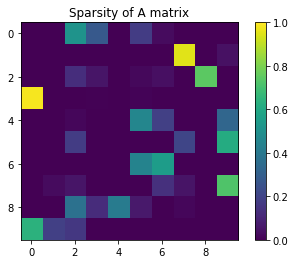

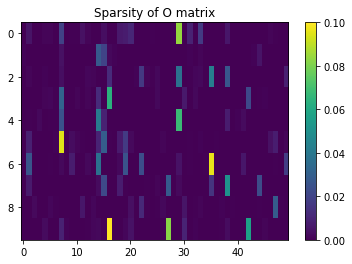

In [20]:
visualize_sparsities(hmm8, O_max_cols=50)

In [22]:
import re
syllable_text = open(os.path.join(os.getcwd(), 'data/Syllable_dictionary.txt')).read()
def parse_text(text):
    lines = [line.split() for line in text.split('\n') if line.split()]

    
    for i in range(len(lines)):
        line = lines[i]
        
        for j in range(len(line)):
            word = line[j]
            word = re.sub(r'[^\w]', '', word).lower()
            
            lines[i][j] = word
    return lines

syllable = parse_text(syllable_text)
for i in range(len(syllable)):
    if len(syllable[i]) == 2:
        syllable[i][1] = int(syllable[i][1])
    if len(syllable[i]) != 2:
        syllable[i] = [syllable[i][0], int(syllable[i][-1][-1])]
        
syllable_dict = dict(syllable)

In [58]:
def parse_iambs(lines, syllable_dict):
    # Convert text to dataset.
    total_keys = []
    
    stress_dict = dict()
    unstress_dict = dict()
    
    for i in range(len(lines)): 
        line = lines[i]
        if len(line) > 1:
            syll_counter = 0
            for j in range(len(line)):
                word = line[j]
                word_syll = syllable_dict[word]
                if True:
                    if syll_counter % 2 == 0:
                        unstress_dict[word] = np.tile([0,1], 7)[:word_syll]
                    elif syll_counter % 2 != 0:
                        stress_dict[word] = np.tile([1, 0], 7)[:word_syll]
                syll_counter += word_syll
     
    return stress_dict, unstress_dict


stress_dict, unstress_dict = parse_iambs(parse_text(text), syllable_dict)

In [62]:
unstress_dict

{'from': array([0]),
 'desire': array([0, 1]),
 'increase': array([0, 1]),
 'that': array([0]),
 'might': array([0]),
 'but': array([0]),
 'the': array([0]),
 'by': array([0]),
 'decease': array([0, 1]),
 'his': array([0]),
 'contracted': array([0, 1, 0]),
 'thine': array([0]),
 'bright': array([0]),
 'feedst': array([0]),
 'lights': array([0]),
 'with': array([0]),
 'making': array([0, 1]),
 'a': array([0]),
 'abundance': array([0, 1, 0]),
 'thy': array([0]),
 'to': array([0]),
 'sweet': array([0]),
 'too': array([0]),
 'thou': array([0]),
 'art': array([0]),
 'fresh': array([0]),
 'and': array([0]),
 'within': array([0, 1]),
 'bud': array([0]),
 'content': array([0, 1]),
 'makst': array([0]),
 'in': array([0]),
 'pity': array([0, 1]),
 'or': array([0]),
 'this': array([0]),
 'due': array([0]),
 'when': array([0]),
 'besiege': array([0, 1]),
 'deep': array([0]),
 'proud': array([0]),
 'so': array([0]),
 'on': array([0]),
 'will': array([0]),
 'of': array([0]),
 'worth': array([0]),
 '

In [61]:
#hmm1 = unsupervised_HMM(obs, 1, 100)
print('\nSample Sonnet:\n====================')
for i in range(14):
    print(sample_sentence2(hmm8, obs_map, stress_dict, unstress_dict) + ',')


Sample Sonnet:
Yet sickly for the nor were of thee thrice,
In sorrow journey i all fell stoln that,
Night often thy sad vacant the my doth,
Sun to that costs to verse not or no me,
So on the aprils utmost hours know,
Thy affords means but play thee know but do,
Whose is which thou would self and this their self,
Then spirits that makes thee is great all and,
Why time not self not much thee injuries,
I art need the eyes and swear this that great,
That weak black will and from wide resurvey,
The which with time to from the whose as should,
Happy was have and know of strong dead not,
Thine to truth thorns yet his thy torment let,


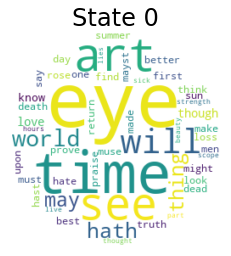

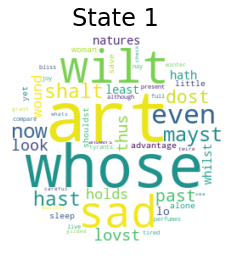

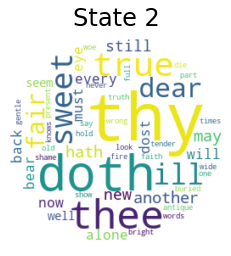

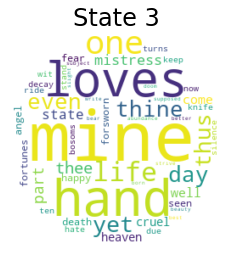

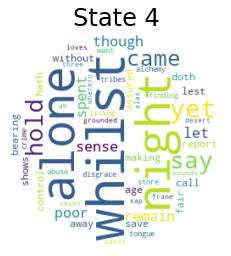

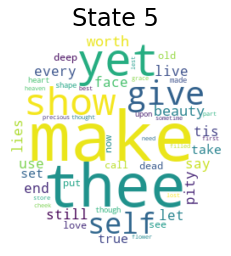

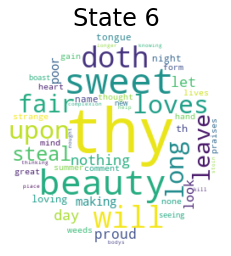

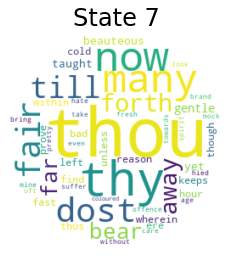

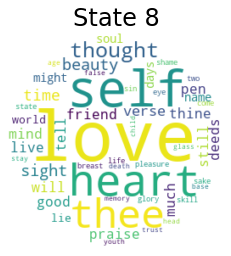

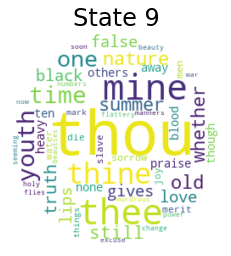

In [51]:
wordclouds = states_to_wordclouds(hmm8, obs_map)